<a href="https://colab.research.google.com/github/Lilian-flp/DesafioDIoSantader2025/blob/main/desafioDioSantader2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#carregar os dados do aruivo CSV
file_path = "dados-ibge .csv"
df = pd.read_csv(file_path)

#visualizar primeiras linha das tabela
print(df.head())




  Unnamed: 0       Ano Unnamed: 2 Unnamed: 3 Unnamed: 4
0     Região  1991 (%)   2000 (%)   2010 (%)   2022 (%)
1      Norte         7        7,6        8,3        8,5
2   Nordeste      28,5       28,1       27,8       26,9
3    Sudeste      42,7       42,6       42,1       41,8
4        Sul      15,1       14,8       14,4       14,7


In [3]:
import pandas as pd

#Carregar o arquivo pulando a primeira linha
df = pd.read_csv('dados-ibge .csv', skiprows=1)

# Limpeza de dados: converter vírgula para ponto e transformar em número
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Calcular a média das colunas de anos (1991, 2000, 2010, 2022)
df['Media'] = df.iloc[:, 1:].mean(axis=1)

# Selecionar apenas a Região e a Média calculada
df_mudar = df.iloc[:, [0, -1]]

# Renomear as colunas para o formato desejado
df_mudar.columns = ['Regioes do Brasil', 'Medias da população Regional (%)']

# Visualizar o resultado
print(df_mudar)

# Salvar em Excel ou CSV
df_mudar.to_csv('media_regional_ibge.csv', index=False, encoding='utf-8-sig')

  Regioes do Brasil  Medias da população Regional (%)
0             Norte                             7.850
1          Nordeste                            27.825
2           Sudeste                            42.300
3               Sul                            14.750
4      Centro-Oeste                             7.275
5    BRASIL (Total)                           100.000


In [4]:
import pandas as pd

# Carregar os dados ignorando a linha de cabeçalho "Ano"
df = pd.read_csv('dados-ibge .csv', skiprows=1)

# Remover a linha "BRASIL (Total)"
df = df.drop(df.index[-1])

# Limpeza: Converter as colunas de porcentagem para números (float)
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Calcular a média
df['Media'] = df.iloc[:, 1:].mean(axis=1)

# Criar a resposta automática formatada
print("📊 RELATÓRIO DE EVOLUÇÃO POPULACIONAL POR REGIÃO\n")
print("-" * 50)

# Iterar por cada linha (região)
for index, linha in df.iterrows():
    regiao = linha['Região']
    print(f"📍 REGIÃO: {regiao.upper()}")

    # Mostrar os anos específicos (colunas de 1991 a 2022)
    for ano_col in df.columns[1:-1]: # Pega as colunas de anos, ignora a 'Media'
        ano_nome = ano_col.replace(' (%)', '')
        valor = linha[ano_col]
        print(f"   • Em {ano_nome}: {valor}% da população nacional.")

    # Mostrar a média final daquela região
    media_regiao = linha['Media']
    print(f"   ✅ MÉDIA HISTÓRICA: {media_regiao:.2f}%")
    print("-" * 50)

📊 RELATÓRIO DE EVOLUÇÃO POPULACIONAL POR REGIÃO

--------------------------------------------------
📍 REGIÃO: NORTE
   • Em 1991: 7.0% da população nacional.
   • Em 2000: 7.6% da população nacional.
   • Em 2010: 8.3% da população nacional.
   • Em 2022: 8.5% da população nacional.
   ✅ MÉDIA HISTÓRICA: 7.85%
--------------------------------------------------
📍 REGIÃO: NORDESTE
   • Em 1991: 28.5% da população nacional.
   • Em 2000: 28.1% da população nacional.
   • Em 2010: 27.8% da população nacional.
   • Em 2022: 26.9% da população nacional.
   ✅ MÉDIA HISTÓRICA: 27.83%
--------------------------------------------------
📍 REGIÃO: SUDESTE
   • Em 1991: 42.7% da população nacional.
   • Em 2000: 42.6% da população nacional.
   • Em 2010: 42.1% da população nacional.
   • Em 2022: 41.8% da população nacional.
   ✅ MÉDIA HISTÓRICA: 42.30%
--------------------------------------------------
📍 REGIÃO: SUL
   • Em 1991: 15.1% da população nacional.
   • Em 2000: 14.8% da população nacion

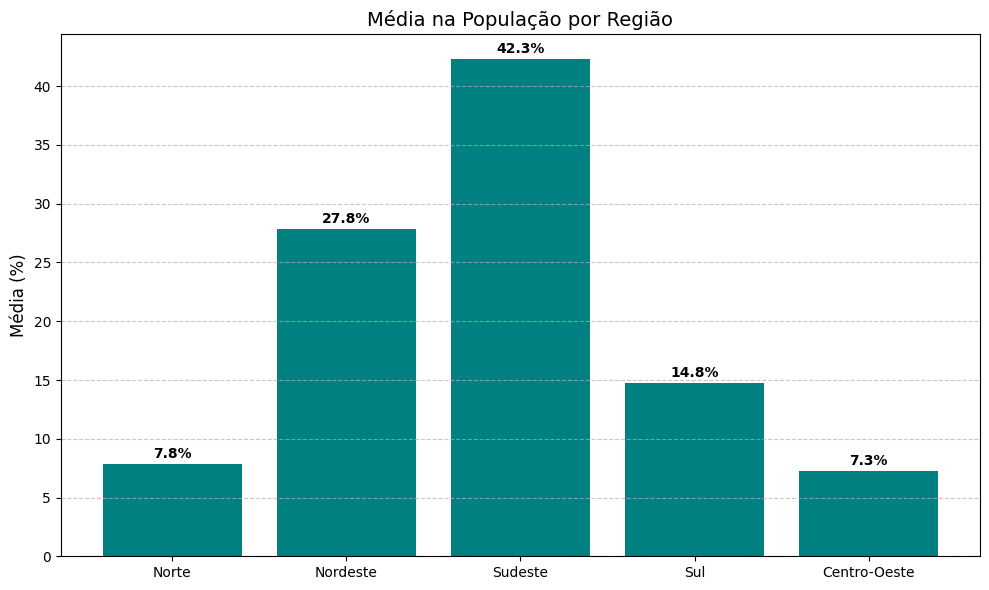

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo
df = pd.read_csv('dados-ibge .csv', skiprows=1)

# Remover a última linha (BRASIL (Total))
df = df.drop(df.index[-1])

# Limpeza: converter vírgula para ponto e transformar em número
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Calcular a média por região (axis=1)
df['Media'] = df.iloc[:, 1:].mean(axis=1)

# Selecionar e renomear colunas para o gráfico
df_mudar = df.iloc[:, [0, -1]]
df_mudar.columns = ['Regioes do Brasil', 'Medias da população Regional (%)']

# --- GERAÇÃO DO GRÁFICO ---
plt.figure(figsize=(10, 6))

# Criando as barras
plt.bar(df_mudar['Regioes do Brasil'], df_mudar['Medias da população Regional (%)'], color='teal')

# Customização
plt.title('Média na População por Região', fontsize=14)
plt.ylabel('Média (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionando os rótulos acima das barras
for i, valor in enumerate(df_mudar['Medias da população Regional (%)']):
    plt.text(i, valor + 0.5, f'{valor:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()